# Data Analysis Project


* [Normalization](#Normalization) <br>
    - [Decimal Scaling Method](#Decimal-Scaling) <br>
    - [Min-Max Method](#Min-Max) <br>
    - [Z-Score](#Z-Score)<br><br> 
* [Outliers Detection](#Outliers-Detection) <br>
    - [Thershold = 2 Standard Deviation](#2-Standard-Deviation) <br>
    - [Thershold = 3 Standard Deviation](#3-Standard-Deviation) <br> <br>
* [Flower Segmentation Using K-Means](#Flower-Segmentation-Using-K-Means)
    - [Describing Iris Dataset](#Describing-Iris-Dataset)
    - [Implementing K-Means Algorithm](#Implementing-K-Means-Algorithm)

## Requaierd Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Normalization

**X = {-5.0, 23.0, 17.6, 7.23, 1.11}** <br><br>
normalize X using following methods:
- Decimal scaling on interval [-1, 1],
- Min–Max normalization on interval [0, 1], 
- Standard deviation normalization.


- ### Decimal Scaling

In [11]:
x = [-5, 23, 17.6, 7.23, 1.11]

In [57]:
def decimal_normalizer(lst):
    max_ = str(max(lst))
    max_decimal = max_.split('.')[0]
    
    j = len(max_decimal)
    
    normalized_numbers = map(lambda x: x/(10**j), lst)
    
    return list(normalized_numbers)

decimal_normalizer(x)

[-0.05, 0.23, 0.17600000000000002, 0.0723, 0.0111]

 - ### Min-Max

In [11]:
x = [-5, 23, 17.6, 7.23, 1.11]

In [59]:
def min_max_normalizer(lst):
    min_, max_ = min(lst), max(lst)
    
    normalized_numbers = map(lambda x: (x-min_)/(max_-min_), lst)
    
    return list(normalized_numbers)
    

min_max_normalizer(x)

[0.0, 1.0, 0.8071428571428572, 0.4367857142857143, 0.21821428571428572]

 - ###  Z-Score

In [15]:
x = [-5, 23, 17.6, 7.23, 1.11]

In [16]:
def z_score_normalizer(lst):
    expected_value = np.mean(lst)
    variance = np.var(lst)
    
    normalized_numbers = map(lambda x: (x-expected_value)/(variance), lst)
    
    return list(normalized_numbers)

z_score_normalizer(x)

[-0.12980110644617074,
 0.13379266933659548,
 0.08295672686420487,
 -0.014667110809626776,
 -0.07228117894500283]

 ## Outliers Detection

**C = {3, 1, 0, 2, 7, 3, 6, 4, 2, 0, 0, 10, 15, 6}** <br><br>
Find the **outliers** in set **C** using standard statistical parameters mean and variance when:
- Threshold value is +-2 Standard Deviation
- Threshold value is +-3 Standard Deviation

 - ### 2 Standard Deviation

In [3]:
c = pd.Series([3, 1, 0, 2, 7, 3, 6, 4, 2, 0, 0, 10, 15, 6])

In [13]:
mean = np.mean(c)
std = np.std(c)

upper_bound = mean + 2 * std
lower_bound = mean - 2 * std

outlier = [x for x in c if ((x>upper_bound) or (x<lower_bound))]

outlier

[15]

 - ### 3 Standard Deviation

In [49]:
c = pd.Series([3, 1, 0, 2, 7, 3, 6, 4, 2, 0, 0, 10, 15, 6])

In [14]:
mean = np.mean(c)
var = np.std(c)

upper_bound = mean + 3 * var
lower_bound = mean - 3 * var

outlier = [x for x in c if ((x>upper_bound) or (x<lower_bound))]

outlier

[]

## Flower Segmentation Using K-Means

This part includes: <br>
- Describing Iris datasets.
- Implementing K-Means algorithm.

- ### Describing Iris Dataset

In [2]:
# Importing data
data = pd.read_csv('Iris.csv')

data['class'] = data['class'].apply(lambda x: x.split('-')[1])

In [3]:
# Looking at top 5 rows of data
data.head(3)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
# Looking at all of unique flower's categories 
data['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# Checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataset contains flowers sepal and petal length and width which stored in 3 following classes:
- setosa
- versicolor
- virginica.<br>

Furtunaitly We don't have any missing value in this dataset. <br>
I'm going to plot Scatter-Plot for each 2 attributes for finding their relationships.

In [6]:
# Creating a dataset that includes attributs
X = data.drop('class', axis=1).copy()

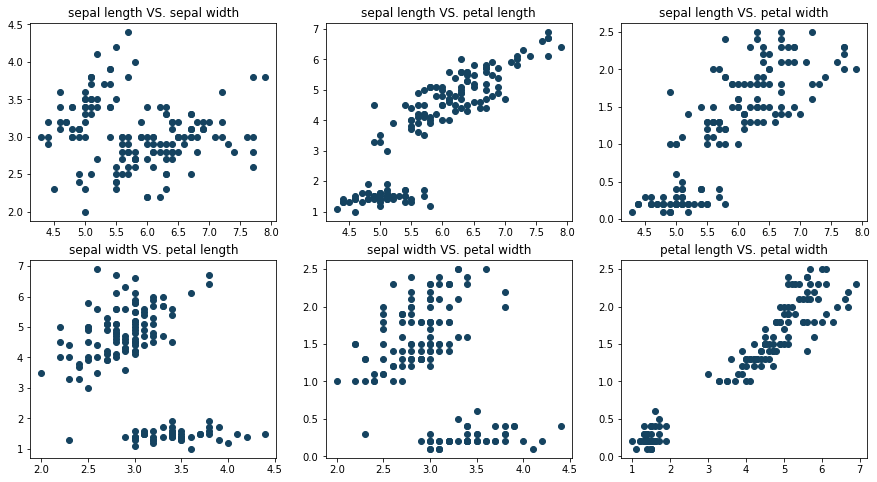

In [7]:
# Finding relations between attributes by plotting scatter plot for each 2 attributes

figure, axis = plt.subplots(2, 3, figsize=(15, 8))

axis[0, 0].scatter(X.iloc[:, 0], X.iloc[:, 1], c='#154360')
axis[0, 0].set_title(f'{X.columns[0]} VS. {X.columns[1]}')

axis[0, 1].scatter(X.iloc[:, 0], X.iloc[:, 2], c='#154360')
axis[0, 1].set_title(f'{X.columns[0]} VS. {X.columns[2]}')

axis[0, 2].scatter(X.iloc[:, 0], X.iloc[:, 3], c='#154360')
axis[0, 2].set_title(f'{X.columns[0]} VS. {X.columns[3]}')

axis[1, 0].scatter(X.iloc[:, 1], X.iloc[:, 2], c='#154360')
axis[1, 0].set_title(f'{X.columns[1]} VS. {X.columns[2]}')

axis[1, 1].scatter(X.iloc[:, 1], X.iloc[:, 3], c='#154360')
axis[1, 1].set_title(f'{X.columns[1]} VS. {X.columns[3]}')

axis[1, 2].scatter(X.iloc[:, 2], X.iloc[:, 3], c='#154360')
axis[1, 2].set_title(f'{X.columns[2]} VS. {X.columns[3]}')

plt.show()

According to the above figure, you can easily find that I can separate each chart into 3 segments. So I'm going to implement K-Means algorithm by choosing `K=3`.

- ### Implementing K-Means Algorithm

As I said, I'm going to implement K-Means algorithm with `k=3`.<br>
After choosing K, first step is choosing cetroids for each cluster. I choose random `3` recordes and intialized centroids using  them.<br>
After initializing centroids, I plot data and centroids points in same graph for each 2 attributes.

In [8]:
# Sampling 3 records for initializing centroids 
K = 3
centroids = X.sample(K)

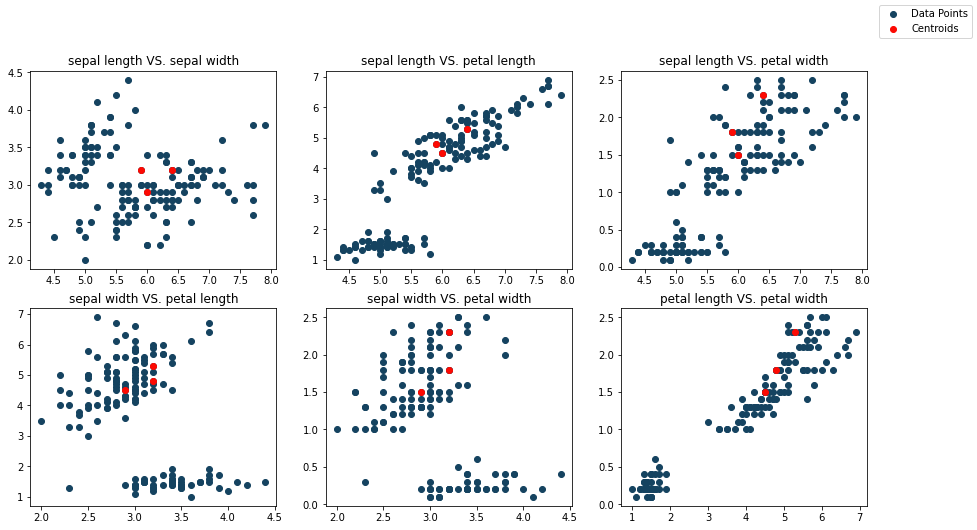

In [12]:
# Plotting attributes and selected centroides

figure, axis = plt.subplots(2, 3, figsize=(15, 8))

axis[0, 0].scatter(X.iloc[:, 0], X.iloc[:, 1], c='#154360', label='Data Points')
axis[0, 0].set_title(f'{X.columns[0]} VS. {X.columns[1]}')
axis[0, 0].scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='#FC0A03', label='Centroids')


axis[0, 1].scatter(X.iloc[:, 0], X.iloc[:, 2], c='#154360')
axis[0, 1].set_title(f'{X.columns[0]} VS. {X.columns[2]}')
axis[0, 1].scatter(centroids.iloc[:, 0], centroids.iloc[:, 2], c='#FC0A03')


axis[0, 2].scatter(X.iloc[:, 0], X.iloc[:, 3], c='#154360')
axis[0, 2].set_title(f'{X.columns[0]} VS. {X.columns[3]}')
axis[0, 2].scatter(centroids.iloc[:, 0], centroids.iloc[:, 3], c='#FC0A03')


axis[1, 0].scatter(X.iloc[:, 1], X.iloc[:, 2], c='#154360')
axis[1, 0].set_title(f'{X.columns[1]} VS. {X.columns[2]}')
axis[1, 0].scatter(centroids.iloc[:, 1], centroids.iloc[:, 2], c='#FC0A03')


axis[1, 1].scatter(X.iloc[:, 1], X.iloc[:, 3], c='#154360')
axis[1, 1].set_title(f'{X.columns[1]} VS. {X.columns[3]}')
axis[1, 1].scatter(centroids.iloc[:, 1], centroids.iloc[:, 3], c='#FC0A03')

axis[1, 2].scatter(X.iloc[:, 2], X.iloc[:, 3], c='#154360')
axis[1, 2].set_title(f'{X.columns[2]} VS. {X.columns[3]}')
axis[1, 2].scatter(centroids.iloc[:, 2], centroids.iloc[:, 3], c='#FC0A03')

figure.legend()
plt.show()

Next step is implementing K-Means algorithm from scratch.<br>
According to the following cell, I'm going to find the distance between each data point and each centroid. After that I decide that each data point belong to which cluster based on distances that calculated before. After that I recalculate centroids.<br>
Thease steps will continue till the centroids does'nt change.

In [13]:
# Implementing K-Means
diff = 1
j=0
XD=X.copy()
while(diff!=0):

    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            columns = ['sepal length', 'sepal width', 'petal length', 'petal width' ]
            d = np.linalg.norm(row_d[columns] -row_c[columns])
            ED.append(d)
        X[i]=ED
        i=i+1
        
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)

    X["Cluster"]=C
    centroids_new = X.groupby(["Cluster"]).mean()[columns]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = centroids_new.subtract(centroids).sum().sum()
        print(f'diffrences between centroids: {diff}')
    centroids = X.groupby(["Cluster"]).mean()[columns]


diffrences between centroids: -1.9608445234535221
diffrences between centroids: -0.7519799363179496
diffrences between centroids: -0.29803722630803653
diffrences between centroids: -0.21255172671131928
diffrences between centroids: 0.0


These are the final centroids for each cluster:

In [24]:
# Centroids of each cluster
centroids

,sepal length,sepal width,petal length,petal width
Cluster,,,,
1,6.850000,3.073684,5.742105,2.071053
2,5.901613,2.748387,4.393548,1.433871
3,5.006000,3.418000,1.464000,0.244000


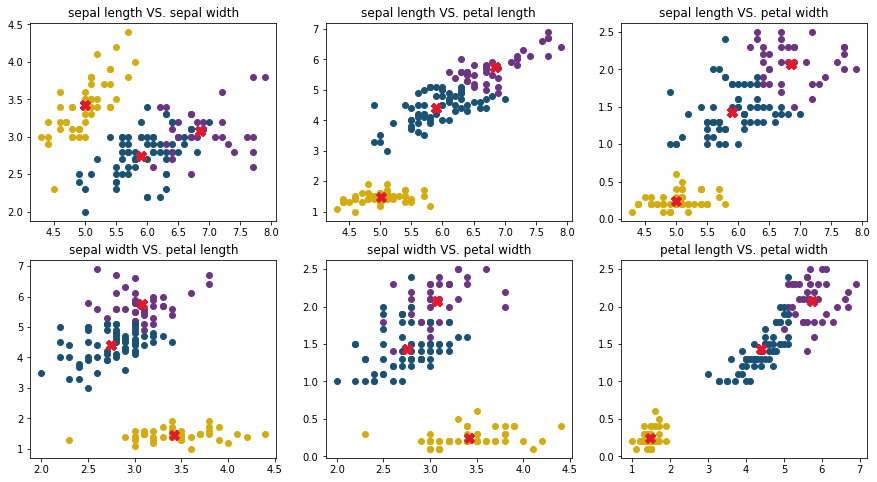

In [23]:
# Plotting devided data based on K-Means algorithm 
figure, axis = plt.subplots(2, 3, figsize=(15, 8))

colors=['#6C3483', '#1A5276', '#D4AC0D']
for k in range(K):
    data = X[X['Cluster'] == k+1]
    axis[0, 0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=colors[k])
    axis[0, 0].set_title(f'{data.columns[0]} VS. {data.columns[1]}')
    axis[0, 0].scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='#E3182D', marker='X', s=100)
#                        centroids

    axis[0, 1].scatter(data.iloc[:, 0], data.iloc[:, 2], c=colors[k])
    axis[0, 1].set_title(f'{data.columns[0]} VS. {data.columns[2]}')
    axis[0, 1].scatter(centroids.iloc[:, 0], centroids.iloc[:, 2], c='#E3182D', marker='X', s=100)


    axis[0, 2].scatter(data.iloc[:, 0], data.iloc[:, 3], c=colors[k])
    axis[0, 2].set_title(f'{data.columns[0]} VS. {data.columns[3]}')
    axis[0, 2].scatter(centroids.iloc[:, 0], centroids.iloc[:, 3], c='#E3182D', marker='X', s=100)


    axis[1, 0].scatter(data.iloc[:, 1], data.iloc[:, 2], c=colors[k])
    axis[1, 0].set_title(f'{data.columns[1]} VS. {data.columns[2]}')
    axis[1, 0].scatter(centroids.iloc[:, 1], centroids.iloc[:, 2], c='#E3182D', marker='X', s=100)


    axis[1, 1].scatter(data.iloc[:, 1], data.iloc[:, 3], c=colors[k])
    axis[1, 1].set_title(f'{data.columns[1]} VS. {data.columns[3]}')
    axis[1, 1].scatter(centroids.iloc[:, 1], centroids.iloc[:, 3], c='#E3182D', marker='X', s=100)

    axis[1, 2].scatter(data.iloc[:, 2], data.iloc[:, 3], c=colors[k])
    axis[1, 2].set_title(f'{data.columns[2]} VS. {data.columns[3]}')
    axis[1, 2].scatter(centroids.iloc[:, 2], centroids.iloc[:, 3], c='#E3182D', marker='X', s=100)
    

plt.show()

As you can see in the above figure, each graph includes 3 clusters and the centroids of each cluster (red X).